<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Android_malware_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Android Malware Prediction With ML Algorithms :

# imported dataset :

In [7]:
import numpy as np
import pandas as pd
import random
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!kaggle datasets download -d subhajournal/android-malware-detection

Dataset URL: https://www.kaggle.com/datasets/subhajournal/android-malware-detection
License(s): GNU Affero General Public License 3.0
android-malware-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip \*.zip && rm *.zip

Archive:  android-malware-detection.zip
replace Android_Malware.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace Android_Malware.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Android_Malware.csv     


In [8]:
data = pd.read_csv("/content/Android_Malware.csv")
print(data)
data = data.drop(' Timestamp', axis=1)

        Unnamed: 0                                  Flow ID     Source IP  \
0                0    172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1                1    172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2                2    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3                3    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4                4    131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...            ...                                      ...           ...   
355625         405      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         406         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627         407  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628         408        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         409         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Source Port   Destination IP   Destination Port   Protocol  \
0   

In [9]:
data.head(10)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
5,5,10.42.0.211-23.208.43.179-50186-443-6,10.42.0.211,50186,23.208.43.179,443.0,6.0,19196263,5,2,...,32.0,1016299.0,0.0,1016299.0,1016299.0,14995041.0,0.0,14995041.0,14995041.0,Android_Adware
6,6,10.42.0.211-23.208.43.179-50186-443-6,10.42.0.211,50186,23.208.43.179,443.0,6.0,4304325,1,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
7,7,172.217.3.110-10.42.0.211-443-40087-6,10.42.0.211,40087,172.217.3.110,443.0,6.0,37926,1,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
8,8,172.217.3.110-10.42.0.211-443-52564-6,10.42.0.211,52564,172.217.3.110,443.0,6.0,36631,1,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
9,9,10.42.0.211-31.13.71.3-46130-443-6,10.42.0.211,46130,31.13.71.3,443.0,6.0,36535,1,2,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [10]:
data.tail(10)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
355620,400,10.42.0.211-10.42.0.1-41286-53-17,10.42.0.211,41286,10.42.0.1,53.0,17.0,31853,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355621,401,10.42.0.211-104.192.110.245-45971-443-6,10.42.0.211,45971,104.192.110.245,443.0,6.0,20028807,10,8,...,20.0,357757.0,0.0,357757.0,357757.0,19671050.0,0.0,19671050.0,19671050.0,Benign
355622,402,10.42.0.211-10.42.0.1-63174-53-17,10.42.0.211,63174,10.42.0.1,53.0,17.0,2169158,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355623,403,10.42.0.211-104.88.93.190-43365-443-6,10.42.0.211,43365,104.88.93.190,443.0,6.0,353,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355624,404,172.217.6.234-10.42.0.211-443-39608-6,10.42.0.211,39608,172.217.6.234,443.0,6.0,118762,4,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355629,409,10.42.0.211-10.42.0.1-9320-53-17,10.42.0.211,9320,10.42.0.1,53.0,17.0,125473,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [11]:
print(data.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Flow Duration                355630 non-null  int64  
 8    Total Fwd Packets            355630 non-null  int64  
 9    Total Backward Packets       355630 non-null  int64  
 10  Total Length of Fwd Packets   355630 non-null  float64
 11   Total Length of Bwd Packets  355630 non-null  float64
 12   Fwd Packet Length Max        355630 non-nul

In [15]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Unnamed: 0  Flow ID   Source IP   Source Port   Destination IP  \
0            False    False       False         False            False   
1            False    False       False         False            False   
2            False    False       False         False            False   
3            False    False       False         False            False   
4            False    False       False         False            False   
...            ...      ...         ...           ...              ...   
355625       False    False       False         False            False   
355626       False    False       False         False            False   
355627       False    False       False         False            False   
355628       False    False       False         False            False   
355629       False    False       False         False            False   

         Destination Port   Protocol   Flow Duration   Total Fwd Packets  \
0                   False      False           False               False   
1                   False      False           False               False   
2                   False      False           False               False   
3                   False      False           False               False   
4                   False      False           False               False   
...                   ...        ...             ...                 ...   
355625              False      False           False               False   
355626              False      False           False               False   
355627              False      False           False               False   
355628              False      False           False               False   
355629              False      False           False               False   

         Total Backward Packets  ...   min_seg_size_forward  Active Mean  \
0                         False  ...                  False        False   
1                         False  ...                  False        False   
2                         False  ...                  False        False   
3                         False  ...                  False        False   
4                         False  ...                  False        False   
...                         ...  ...                    ...          ...   
355625                    False  ...                  False        False   
355626                    False  ...                  False        False   
355627                    False  ...                  False        False   
355628                    False  ...                  False        False   
355629                    False  ...                  False        False   

         Active Std   Active Max   Active Min  Idle Mean   Idle Std  \
0             False        False        False      False      False   
1             False        False        False      False      False   
2             False        False        False      False      False   
3             False        False        False      False      False   
4             False        False        False      False      False   
...             ...          ...          ...        ...        ...   
355625        False        False        False      False      False   
355626        False        False        False      False      False   
355627        False        False        False      False      False   
355628        False        False        False      False      False   
355629        False        False        False      False      False   

         Idle Max   Idle Min  Label  
0           False      False  False  
1           False      False  False  
2           False      False  False  
3           False      False  False  
4           False      False  False  
...           ...        ...    ...  
355625      False      False  False  
355626      False      False  False  
355627      False      False

In [18]:
data['Label']

0         Android_Adware
1         Android_Adware
2         Android_Adware
3         Android_Adware
4         Android_Adware
               ...      
355625            Benign
355626            Benign
355627            Benign
355628            Benign
355629            Benign
Name: Label, Length: 355630, dtype: object

In [19]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2885, 85)


In [20]:
data = data.drop_duplicates()
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [21]:
data.shape

(352745, 85)

In [22]:
print(data['Label'].value_counts())
names=sorted(data['Label'].unique().tolist())
print(names)

Label
Android_Adware         147443
Android_Scareware      117070
Android_SMS_Malware     64524
Benign                  23708
Name: count, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


# LabelEncode Method :

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [24]:
jionds
print("print the values for connecting to the world to this main content to this folowing connnectivity error to the following with the format connnection to this concertain to the earth relatable certain connect")
ndoibsn
lfsmofs
gfmfgm
iijyijy
teyotyop
tylmotrp


NameError: name 'jionds' is not defined

In [25]:
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

data1 = labelencoder(data)
data1.dropna(axis=0, inplace=True)

# Find missing values
missing_values = data1.isna().sum()
print(missing_values)

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
Idle Mean          0
 Idle Std          0
 Idle Max          0
 Idle Min          0
Label              0
Length: 85, dtype: int64


In [26]:
print(data1.dtypes)

Unnamed: 0           int64
Flow ID              int64
 Source IP           int64
 Source Port         int64
 Destination IP      int64
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label                int64
Length: 85, dtype: object


In [27]:
data1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,133842,10,50004,1285,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,133816,10,35455,1285,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,111350,10,51775,649,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,111350,10,51775,649,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,111351,10,51776,649,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,135200,718,80,18,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
355626,406,72469,10,7632,16,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
355627,407,75843,10,45970,100,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,3
355628,408,65109,10,51982,16,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [28]:
print("Total Features : ",len(data1.columns)-1)

Total Features :  84


In [29]:
from sklearn.utils import resample

def balance_data(data, random_state=0):
    X = data.drop("Label", axis=1)
    y = data["Label"]
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()
    balanced_data = pd.DataFrame(columns=data.columns)

    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])

    balanced_data = balanced_data.sample(frac=1, random_state=random_state)

    return balanced_data

#Train and Test

In [30]:
balanced_data = balance_data(data1)
balanced_class_counts = balanced_data["Label"].value_counts()
print(balanced_class_counts)

Label
0    23708
2    23708
3    23708
1    23708
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

# Data Visualization :

array([[<Axes: title={'center': 'Flow ID'}>]], dtype=object)

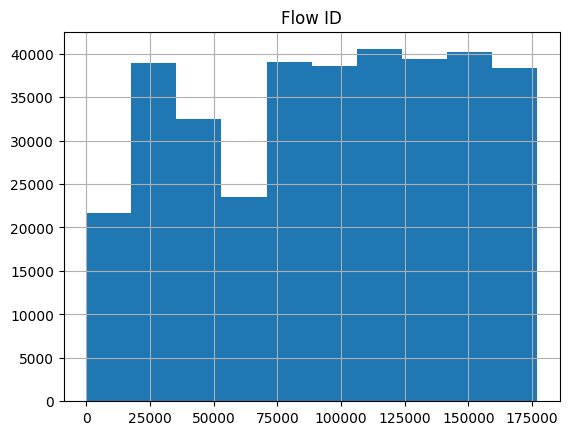

In [32]:
data1.hist(column='Flow ID')

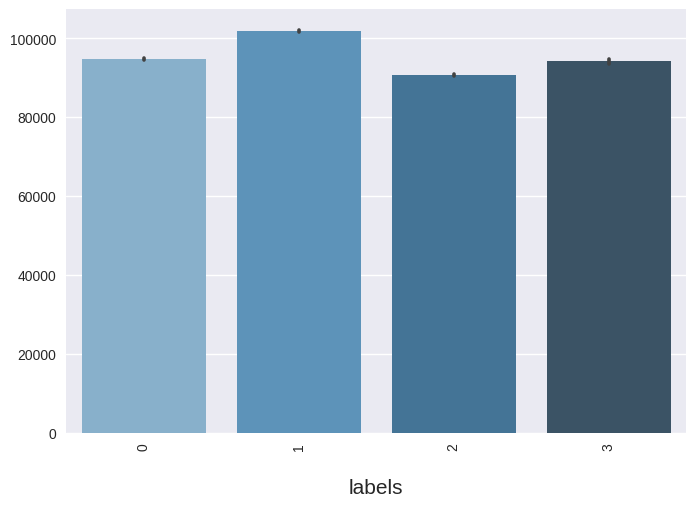

In [33]:
import seaborn as sns
plt.style.use('seaborn')

top_5_crimes = data1['Flow ID'].value_counts().sort_values(ascending=False).head()


sns.barplot(x='Label', y='Flow ID', data=data1, palette="Blues_d")

plt.xlabel("\nlabels", fontdict = {'fontsize': 15})
plt.ylabel("")
plt.xticks(rotation=90)
plt.show()

In [34]:
print("Train features size : ",len(train_x))


Train features size :  282192


In [35]:
print("Train labels size : ",len(train_y))


Train labels size :  282192


In [36]:
print("Test features size : ",len(test_x))


Test features size :  70549


In [37]:
print("Test features size : ",len(test_y))

Test features size :  70549


In [38]:
print("Train features : ",train_x.shape)



Train features :  (282192, 84)


In [39]:
print("Train labels : ",train_y.shape)


Train labels :  (282192,)


In [40]:
print("Test Features : ",test_x.shape)


Test Features :  (70549, 84)


In [41]:
print("Test labels : ",test_y.shape)

Test labels :  (70549,)


<Axes: title={'center': 'Correlation Heatmap of the Dataset'}>

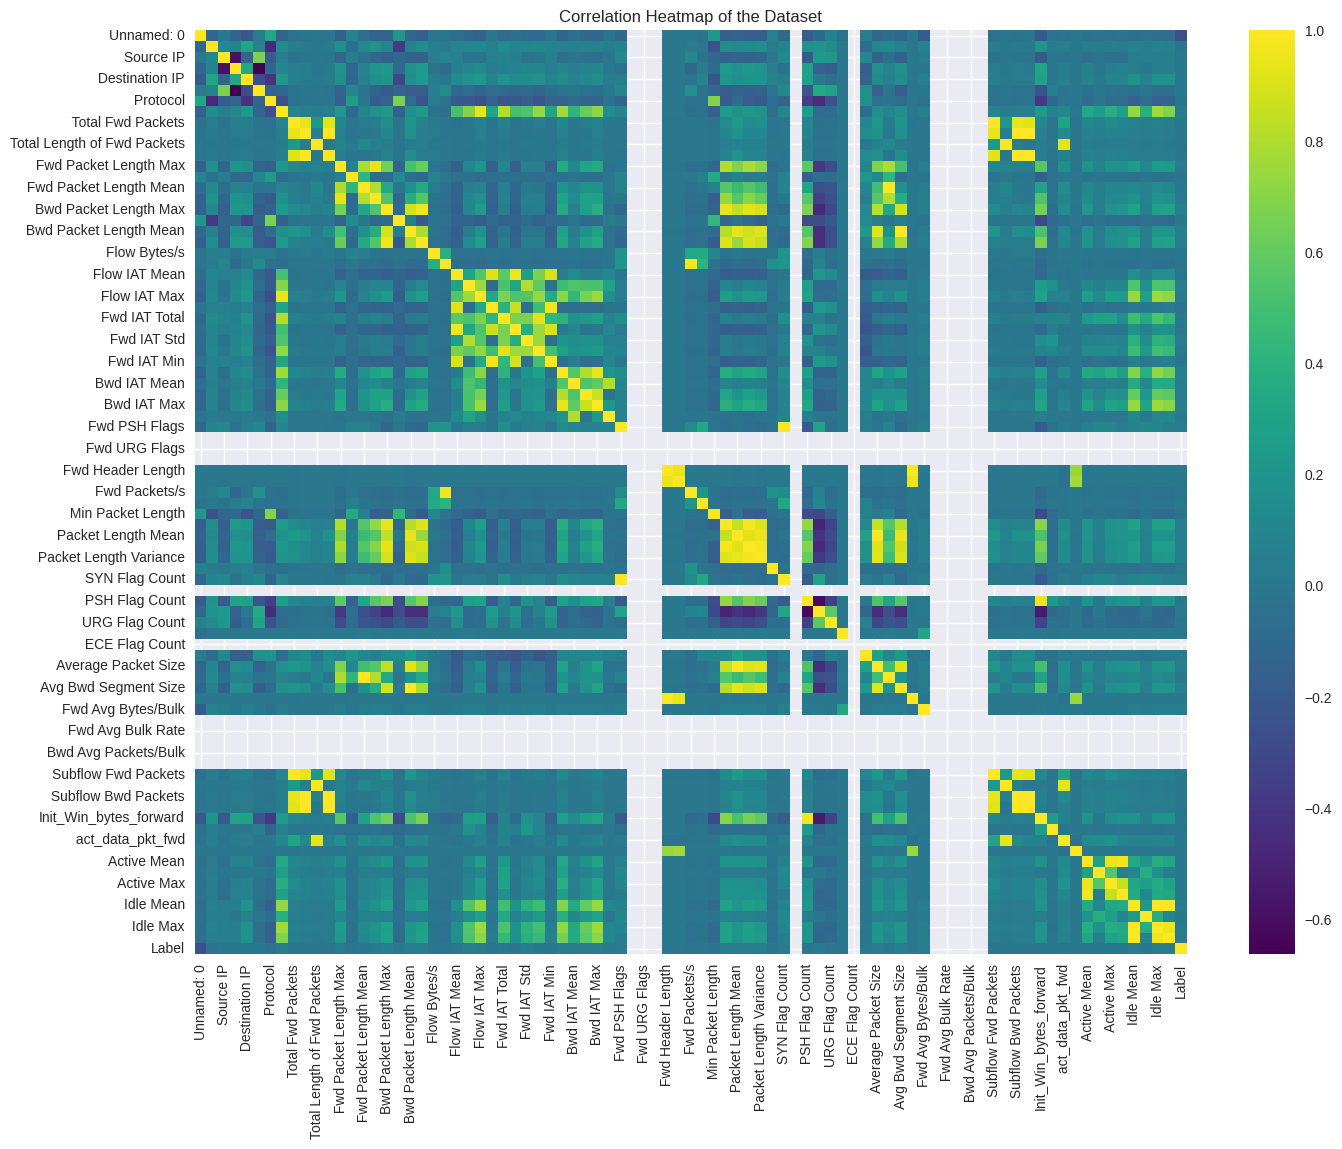

In [42]:
plt.figure(figsize=(16,12))
plt.title("Correlation Heatmap of the Dataset")
sns.heatmap(data.corr(), cmap="viridis", annot=False)

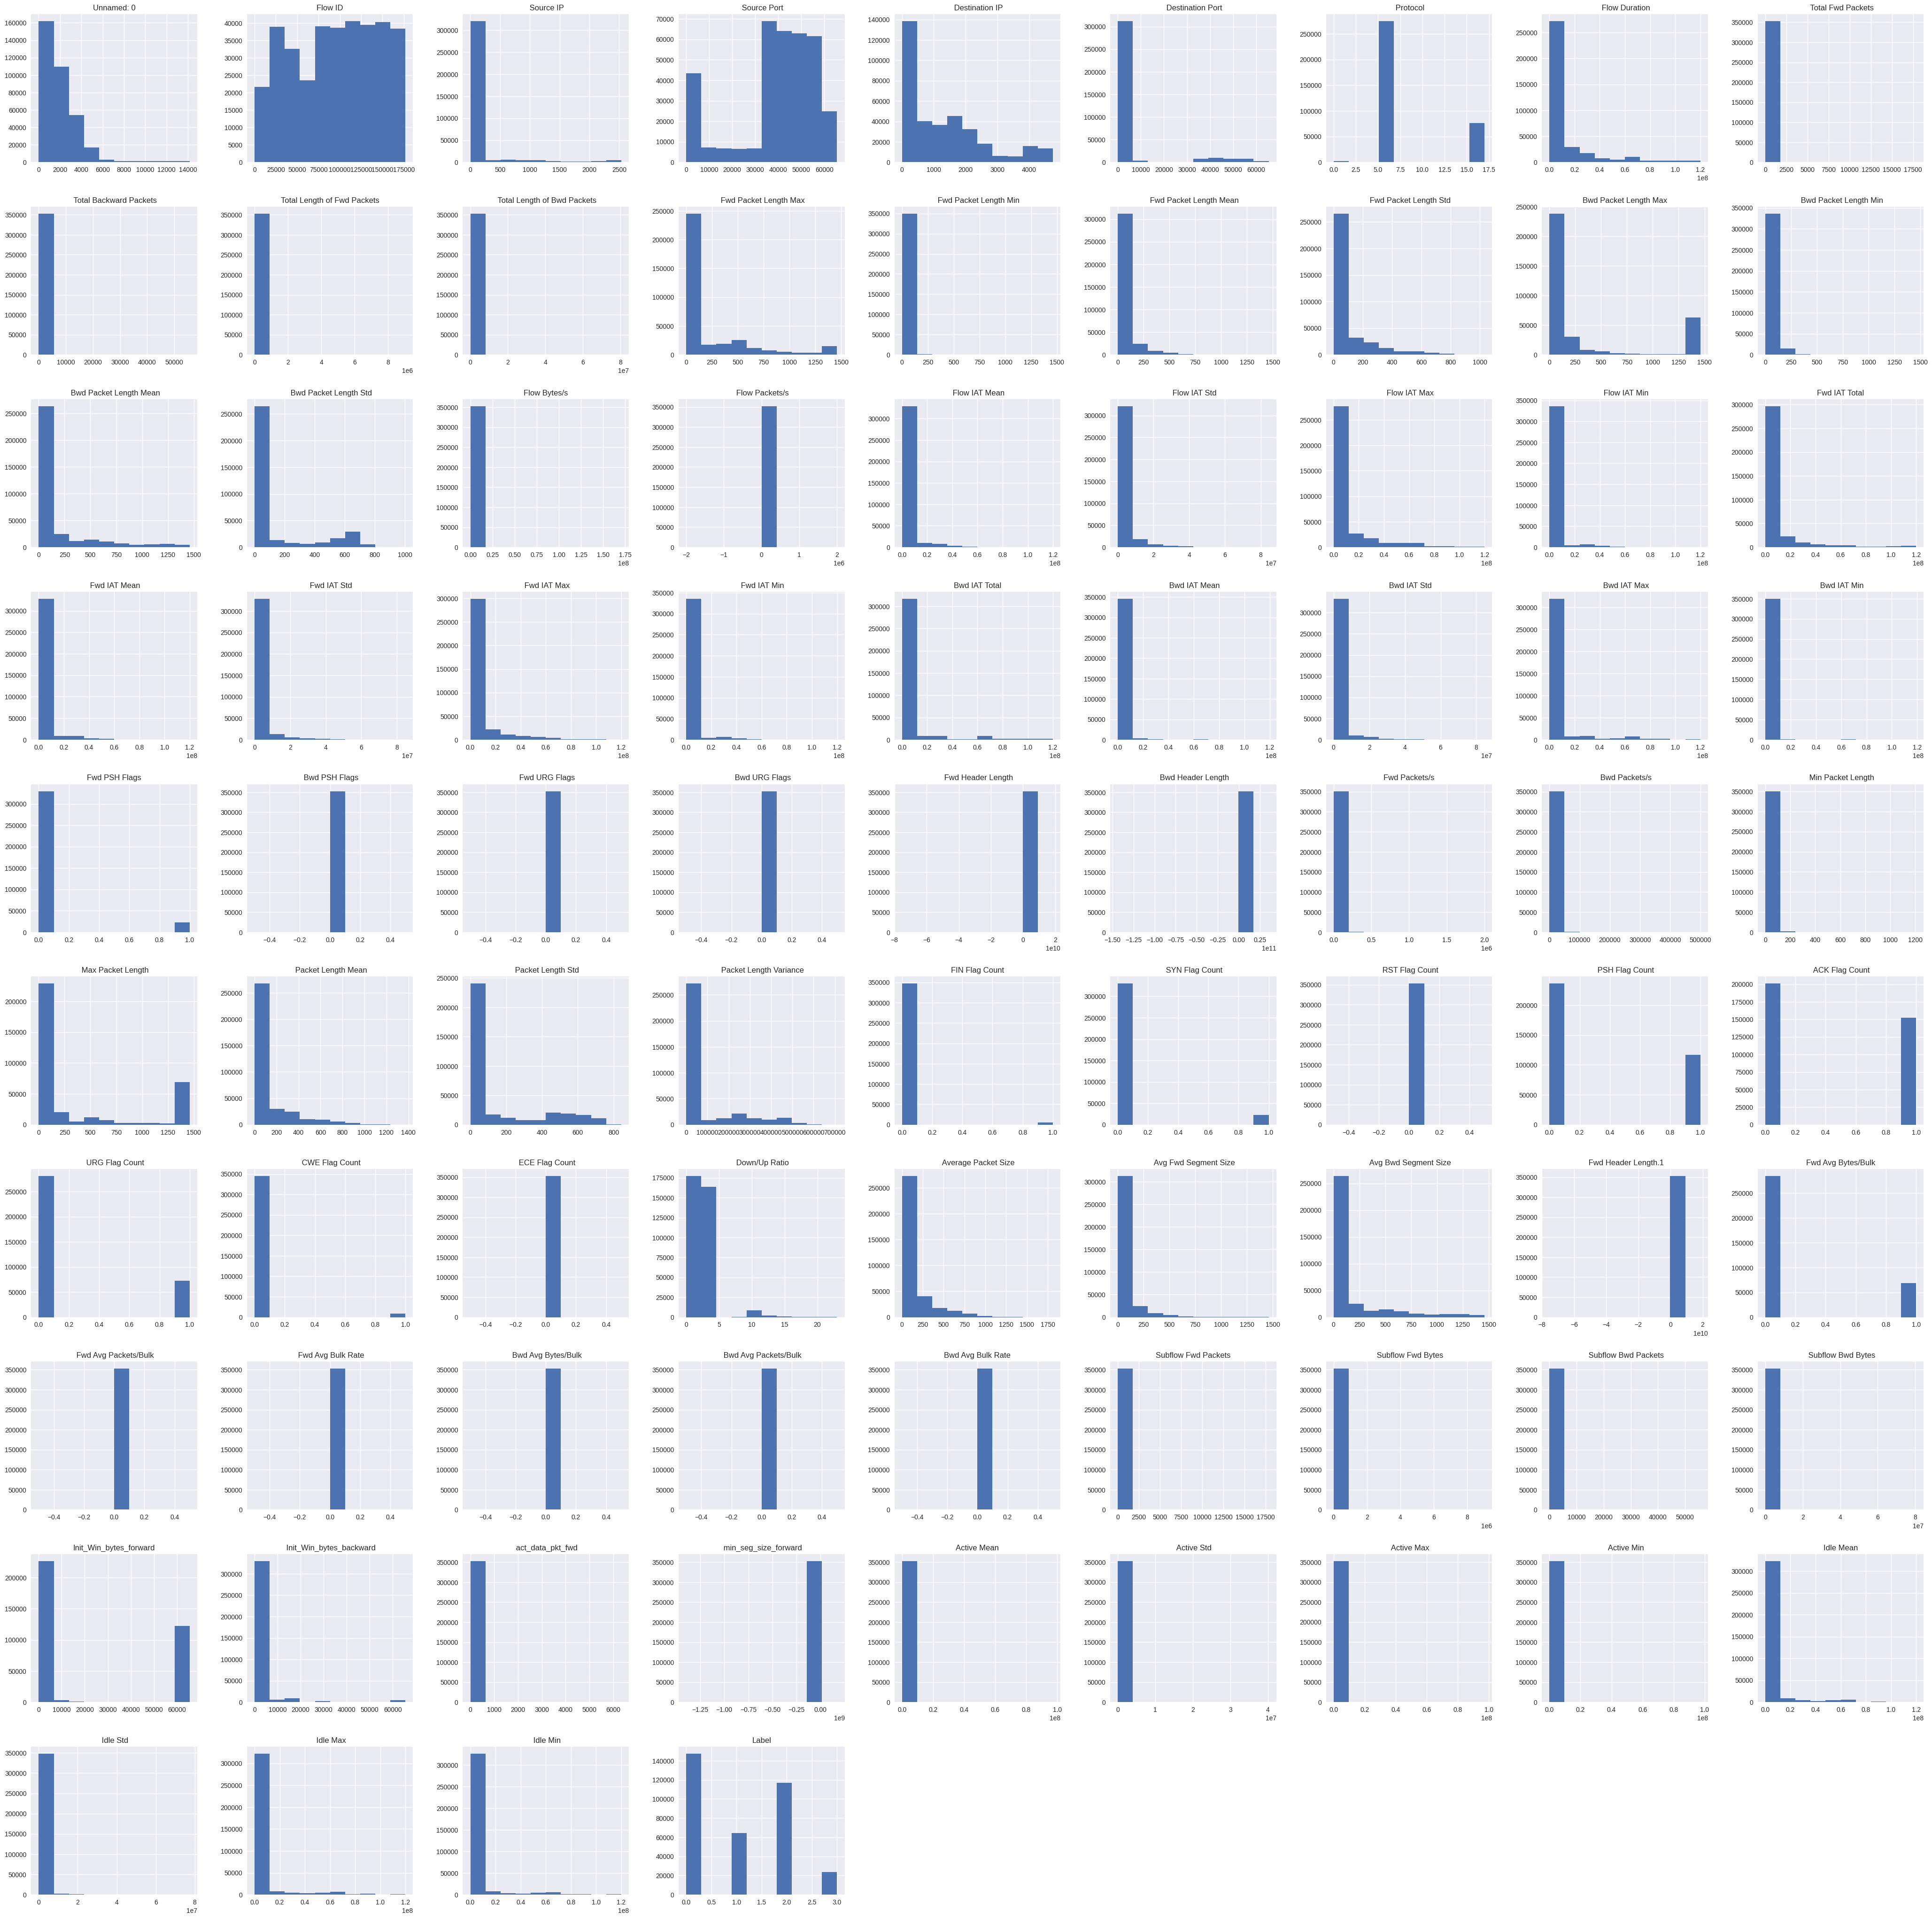

In [43]:
data1.hist(bins=10, figsize=(52,52))
plt.show()

In [44]:
X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target variable

In [45]:
y

0         0
1         0
2         0
3         0
4         0
         ..
355625    3
355626    3
355627    3
355628    3
355629    3
Name: Label, Length: 352741, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algorithm -1

In [47]:

from sklearn.tree import DecisionTreeClassifier


In [48]:
from sklearn.metrics import classification_report, roc_curve, auc

In [49]:
from sklearn.metrics import classification_report, roc_curve, auc

In [50]:
from sklearn.metrics import classification_report, roc_curve, auc

In [52]:
model1 = DecisionTreeClassifier(random_state=42)

In [53]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
model1.score(X_train, y_train)

1.0

In [56]:
y_pred1 = model1.predict(X_test)

In [57]:
y_pred1

array([2, 0, 2, ..., 2, 0, 0])

In [60]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)
cm

array([[23265,     0,  5735,   556],
       [    0, 12816,     0,   103],
       [ 5632,     0, 17127,   593],
       [  543,   126,   603,  3450]])

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

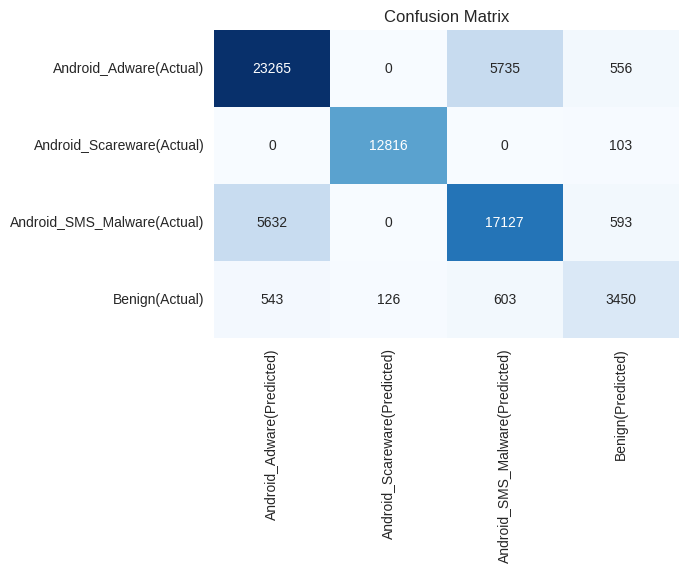

In [63]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)','Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)','Android_SMS_Malware(Actual)', 'Benign(Actual)'])
plt.title("Confusion Matrix")
plt.show()






In [62]:
classification_rep = classification_report(y_test, y_pred1)
print("DecisionTreeClassifier")
print(classification_rep)


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     29556
           1       0.99      0.99      0.99     12919
           2       0.73      0.73      0.73     23352
           3       0.73      0.73      0.73      4722

    accuracy                           0.80     70549
   macro avg       0.81      0.81      0.81     70549
weighted avg       0.80      0.80      0.80     70549



# Algorithm -2

In [64]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred2 = model2.predict(X_test)

In [66]:
cm2 = confusion_matrix(y_test, y_pred2)

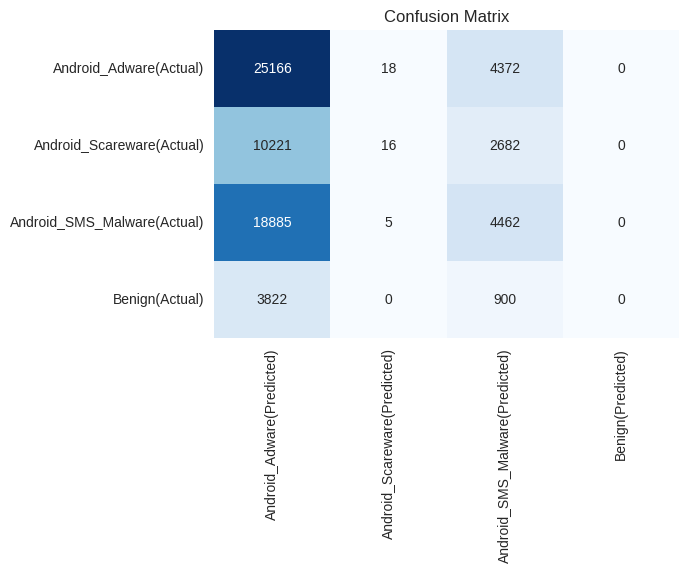

In [67]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)','Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)','Android_SMS_Malware(Actual)', 'Benign(Actual)'])
plt.title("Confusion Matrix")
plt.show()

In [68]:
classification_rep2 = classification_report(y_test, y_pred2)
print("LogisticRegression")
print(classification_rep2)

LogisticRegression
              precision    recall  f1-score   support

           0       0.43      0.85      0.57     29556
           1       0.41      0.00      0.00     12919
           2       0.36      0.19      0.25     23352
           3       0.00      0.00      0.00      4722

    accuracy                           0.42     70549
   macro avg       0.30      0.26      0.21     70549
weighted avg       0.38      0.42      0.32     70549



# Algorithm -3

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
model3 = RandomForestClassifier()

In [ ]:
model3.fit(X_train, y_train)

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Android_Adware(Predicted)', 'Android_Scareware(Predicted)','Android_SMS_Malware(Predicted)', 'Benign(Predicted)'], yticklabels=['Android_Adware(Actual)', 'Android_Scareware(Actual)','Android_SMS_Malware(Actual)', 'Benign(Actual)'])
plt.title("Confusion Matrix")
plt.show()

In [ ]:
classification_rep3 = classification_report(y_test, y_pred3)
print("RandomForestClassifier")
print(classification_rep2)